###  GazePoint Guru2 test
* テストプログラム名：gazePoint_fix_3D_eye_pupiDia_blink.py
* テスト環境名：　Anaconda - spy
* 開発環境: Visual Studio Code 
* date:2022.10.13
* 開発者:門馬

* このipynbファイルは、socketで得られた生データを、各項目で数値データとして抽出
*    'ENABLE_SEND_PUPILMM',
*    'ENABLE_SEND_POG_FIX',
*    'ENABLE_SEND_EYE_RIGHT',
*    'ENABLE_SEND_EYE_LEFT',
*    'ENABLE_SEND_BLINK',

In [1]:
#インポートライブラリー
%matplotlib inline
from  utils import *
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [34]:
# 定数＆変数定義２０２２年１０月DELLのモニターにGazePoint を設置
SCREEN_X =1920
SCREEN_Y = 1080

In [37]:
#Raw data　野あるパスを指定
path =  'visual_code'

In [53]:
data= input("Please input a raw data name")
file_time =path + '/guru_time_' + data + '.csv'
file_gaze= path+  '/guru_gaze_data_' + data + '.csv'
file_target = path + '/guru_ball_data_' + data + '.csv'

print(f'time data: {file_time}')

Please input a raw data name2022-10-24_16_28
time data: visual_code/guru_time_2022-10-24_16_28.csv


In [54]:
#データの抽出.csv

df_time = pd.read_csv(file_time)
df = pd.read_csv(file_gaze)
df_tg = pd.read_csv(file_target)

In [56]:
#取得したデータの整形
#グルグルテストでのターゲット座標
df_tg= df_tg.iloc[:, 1:]
df_tg= df_tg.rename(columns = {'0':'x','1':'y'})





#　データ数の確認
num_raws, _  = df.shape
print(f'測定データの列数: {num_raws}')

""" 
必要なデータについて、抽出する為に、ＡＰＩマニュアルを参考に抽出する
'fixationPOG_x':FPOGX,'fixationPOG_y':FPOGY, 'flag_valid_data_fixation':FPOGV,
'3D left eye data x': LEYEX,'3D left eye data y': LEYEY,'3D left eye data z':LEYEZ ,flag 3D left': LPUPILV, 
'3D right eye data x': REYEX,'3D right eye data y': REYEY,'3D right eye data z': REYEZ ,'3D flag right': RPUPILV,
'Blinks': BKDUR, 'pupilDia_Left': LPMM, 'flagDia_L': LPMMV, pupilDia_Rgiht':RPMM, 'flagDia_R':  RPMMV

""" 
#tags =['FPOGX', 'FPOGY', 'LEYEX', 'LEYEY', 'LEYEZ' , 'LPUPILV', 'REYEX', 'REYEY', 'REYEZ', 'RPUPILV', 'BKDUR', 'LPMM', 'LPMMV', 'RPMM', 'LPMMV']
tags =['CNT','TIME','TIME_TICK','FPOGX', 'FPOGY', 'LEYEX', 'LEYEY', 'LEYEZ' , 'LPUPILV', 'REYEX', 'REYEY', 'REYEZ', 'RPUPILV', 'BKDUR', 'LPMM', 'RPMM']

# 生データから必要なデータを抽出するための空のDataFrameを作成
df_new = pd.DataFrame(np.zeros([num_raws, len(tags)]), columns= tags)

# 生データから作成した空のDataFrameに数値を埋めていく
for tag in tqdm(tags):
    for i in range(df.shape[0]):
        data_list = df.iloc[i, 1].split() # 必要なカラムを選択
        for sep_list in data_list:
            if tag in sep_list:
                if 'LPMMV' in sep_list or 'RPMMV' in sep_list:
                    continue

                else:    
                    m = re.findall('"([^"]*)"', sep_list)
                    if m != []:
                        m = float(m[0])
                        df_new[tag][i] = m


測定データの列数: 2653


100%|██████████████████████████████████████████████████████████████████████████████████| 16/16 [00:25<00:00,  1.61s/it]


In [59]:
#測定開始からの経過時間に変更
df_new['TIME2'] = df_time['0']-  df_time['0'][0]
#統計データの表示
df_new.describe()

,CNT,TIME,TIME_TICK,FPOGX,FPOGY,LEYEX,LEYEY,LEYEZ,LPUPILV,REYEX,REYEY,REYEZ,RPUPILV,BKDUR,LPMM,RPMM,TIME2
count,2653.000000,2.653000e+03,2.653000e+03,2653.000000,2653.000000,2653.000000,2653.000000,2653.000000,2653.000000,2653.000000,2653.000000,2653.000000,2653.000000,2653.0,2653.000000,2653.000000,2653.000000
mean,646382.038447,5.182932e+12,5.292651e+12,0.458601,0.440735,-0.029001,-0.009565,0.662674,0.979269,0.038755,-0.016578,0.590729,0.930268,0.0,5.855038,6.404382,21.892675
std,1108.612436,7.542567e+11,1.824007e+08,0.219991,0.323859,0.009731,0.005201,0.342314,0.142510,0.011065,0.004699,0.162967,0.254743,0.0,0.708146,0.748396,12.670311
min,643915.000000,1.057305e+04,5.292245e+12,0.080770,-0.095150,-0.119940,-0.058830,0.000000,0.000000,0.000000,-0.020970,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,645590.000000,5.292515e+12,5.292521e+12,0.249480,0.104230,-0.030080,-0.010600,0.617690,1.000000,0.038900,-0.018680,0.615490,1.000000,0.0,5.285470,6.005390,10.927088
50%,646611.000000,5.292689e+12,5.292689e+12,0.484490,0.439760,-0.028280,-0.009410,0.629850,1.000000,0.040910,-0.017640,0.634320,1.000000,0.0,5.887530,6.479300,21.863837
75%,647280.000000,5.292799e+12,5.292799e+12,0.630670,0.745780,-0.026150,-0.008510,0.641750,1.000000,0.043500,-0.016770,0.642240,1.000000,0.0,6.375860,6.966650,32.844037
max,647950.000000,5.292909e+12,5.292909e+12,0.952750,1.212910,0.000000,0.000000,3.922470,1.000000,0.052130,0.000000,0.701210,1.000000,0.0,8.115320,8.623030,43.869220


In [46]:
#欠損値の有無
#df_new.isnull().sum()

In [60]:
#グルテスト時間
x= df_new.shape[0]
test_time= df_new['TIME2'][x-1]-df_new['TIME2'][0]
print("グルグルテスト時間: {:.2f}sec".format(test_time))
print("取得した画像データのフレームレートFPS: {:.2f}".format(x/test_time))
print("画像データからの注視点（R)の検出率: {:.2f}%".format(df_new['RPUPILV'].sum()/x*100))

グルグルテスト時間: 43.87sec
取得した画像データのフレームレートFPS: 60.48
画像データからの注視点（R)の検出率: 93.03%


In [61]:
df_tg

,x,y
0,1445,535
1,1445,538
2,1445,542
3,1445,545
4,1445,549
...,...,...
2648,1411,355
2649,1412,358
2650,1413,361
2651,1414,364


In [62]:
#ターゲットの座標の正規化
df_tg['norm_x']=((df_tg['x']-round(SCREEN_X/2))/SCREEN_X)*SCREEN_X/SCREEN_Y
df_tg['norm_y'] =((df_tg['y']-round(SCREEN_Y/2))/SCREEN_Y)
df_tg.head()


,x,y,norm_x,norm_y
0,1445,535,0.449074,-0.004630
1,1445,538,0.449074,-0.001852
2,1445,542,0.449074,0.001852
3,1445,545,0.449074,0.004630
4,1445,549,0.449074,0.008333


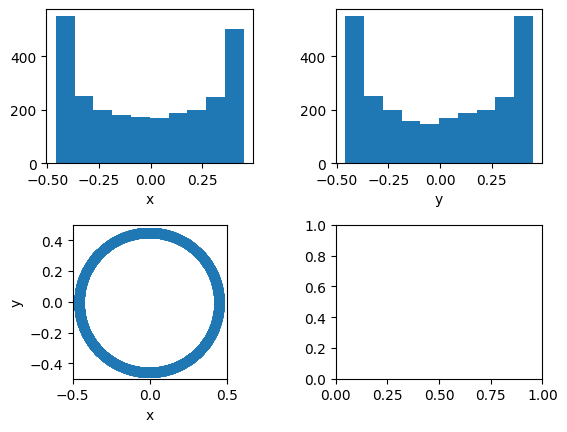

In [100]:
#ターゲットの座標の統計データ表示
fig ,axs = plt.subplots(2,2)
axs[0,0].hist(df_tg['norm_x'])
axs[0,0].set_xlabel('x')
axs[0,1].hist(df_tg['norm_y'])
axs[0,1].set_xlabel('y')
axs[1,0].scatter(df_tg['norm_x'],df_tg['norm_y'])
axs[1,0].set_xlabel('x')
axs[1,0].set_ylabel('y')
axs[1,0].set_xlim(-0.5, 0.5)
axs[1,0].set_ylim(-0.5, 0.5)
axs[1,0].set_aspect('equal', adjustable='box')

plt.subplots_adjust(wspace=0.4, hspace=0.4)

In [88]:

df_new['norm_FPOGX'] = (df_new['FPOGX'] -0.5)
df_new['norm_FPOGY'] = (df_new['FPOGY'] -0.5)

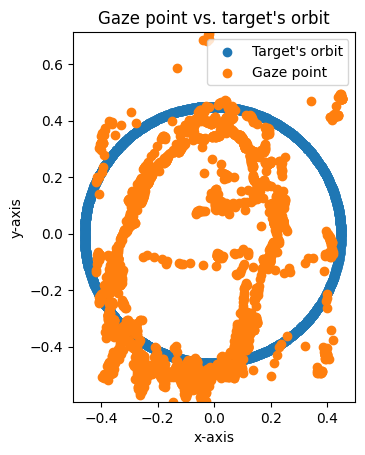

In [108]:
# データ抽出開始時間、終了時間を設定し、DataFrameからスライス

fig, ax = plt.subplots()

ax.scatter(df_tg['norm_x'],df_tg['norm_y'], label="Target's orbit")
ax
ax.scatter(df_new['norm_FPOGX'], df_new['norm_FPOGY'], label='Gaze point')
x_max =df_new['norm_FPOGX'].max()
x_min =df_new['norm_FPOGX'].min()
y_max =  df_new['norm_FPOGY'].max()
y_min =  df_new['norm_FPOGY'].min()
if x_max <= 0.5:
    x_max = 0.5
if x_min >= -0.5:
    x_min = -0.5
if y_max <= 0.5:
    y_max = 0.5
if y_min >= -0.5:
    y_min = -0.5    
    
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)
ax.set_aspect('equal', adjustable='box')
ax.set_title("Gaze point vs. target's orbit")
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.legend()
plt.subplots_adjust(wspace=0.4, hspace=0.4)

Text(0.5, 1.0, 'Heatmap of gaze point')

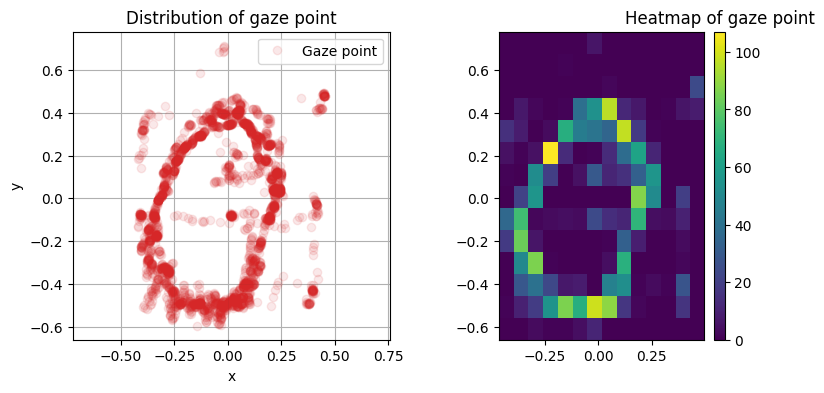

In [117]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
x_micro_dist = df_new['norm_FPOGX'].values
y_micro_dist = df_new['norm_FPOGY'].values
fig, axes = plt.subplots(ncols=2,figsize=(9,4))
ax = axes.ravel()
ax[0].plot(x_micro_dist ,y_micro_dist,"C3o",alpha=0.1, label = 'Gaze point')
ax[0].grid()
ax[0].axis('equal')
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')
ax[0].set_title('Distribution of gaze point')
ax[0].legend()
#ax[0].set_aspect('equal', adjustable='box')
xlim= ax[0].get_xlim()

ylim= ax[0].get_ylim()

xedges = np.linspace(xlim[0],xlim[1],15)
yedges = np.linspace(ylim[0],ylim[1],15)

H, xedge, yedge = np.histogram2d(x_micro_dist, y_micro_dist,bins=(xedges, yedges))

im = ax[1].imshow(H.T, interpolation='nearest', origin='lower',
          extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])
divider = make_axes_locatable(ax[1])
cax = divider.append_axes("right", size="5%", pad=0.1)
plt.colorbar(im, cax=cax)
plt.title('Heatmap of gaze point')

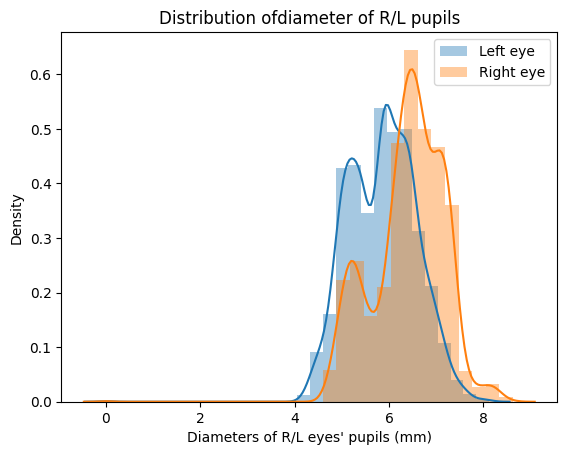

In [133]:
#Diameter of pupils

fig, ax = plt.subplots()
sns.distplot(df_new['LPMM'], bins=30, label= 'Left eye')
sns.distplot(df_new['RPMM'],bins=30, label ='Right eye')
ax.set_title('Distribution ofdiameter of R/L pupils')
ax.set_xlabel("Diameters of R/L eyes' pupils (mm)")#Diameter of pupils
ax.legend();



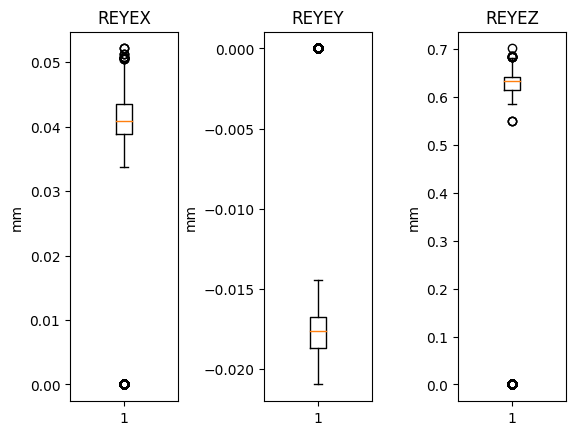

In [168]:
lst= ['REYEX', 'REYEY', 'REYEZ']
fig ,axs = plt.subplots(1,3)
for i in range(3):
    axs[i].boxplot(df_new[lst[i]])
    axs[i].set_title(lst[i])
    axs[i].set_ylabel('mm')

plt.subplots_adjust(wspace=0.8, hspace=0.4)    

In [ ]:
sns.boxplot( data=df_new,  y="right_eye_center_y", x='target_2')

In [174]:
#外れ値の削除（処理: 四分位範囲を計算してそこからバイアス倍分外側の値をバイアス倍分までにクリップする)
def replace_outlier(series, bias=1.5):
    #四分位数
    q1 = series.quantile(.25)
    q3 = series.quantile(.75)
    iqr = q3 - q1

    #外れ値の基準点
    outlier_min = q1 - (iqr) * bias
    outlier_max = q3 + (iqr) * bias

    print("outlier_min :" + str(outlier_min) + ", outlier_max :" + str(outlier_max))

    #外れ値をクリップする
    series = series.clip(outlier_min, outlier_max)
    return series

In [172]:
lst= ['REYEX', 'REYEY', 'REYEZ']
for i in range(3):
    sr = df_new[lst[i]]
    out= replace_outlier(sr, bias=1.5)
    df_new[lst[i]]= out
    

outlier_min :0.032, outlier_max :0.0504
outlier_min :-0.021544999999999995, outlier_max :-0.013905000000000002
outlier_min :0.5753649999999999, outlier_max :0.6823650000000001


In [173]:
#REYEX	REYEY	REYEZ


import plotly.express as px

fig = px.scatter_3d(df_new, x='REYEX', y='REYEY', z='REYEZ')
                    
fig.show()

### 参考文献

 . https://iovs.arvojournals.org/article.aspx?articleid=2638575